<a href="https://colab.research.google.com/github/khadija675/Customer_segmentation-using-Kmeans-Arch-tech-project-/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [20]:
#loading the data from csv file to a pandas Dataframe
customer_data = pd.read_csv('Mall_Customers.csv')


In [21]:
#first five rows of the dataset
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
#finding the no of rows and columns
customer_data.shape

(200, 5)

In [23]:
#info about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
#checkig for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


choosing the Annual income column and Spending Score column

In [25]:
X=customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# SELECTING THE NUMBER OF CLUSTERS

WCSS_ Within Clusters Sum of Squares

In [26]:
#finding WCSS value for different number of clusters

WCSS= []

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)#wcss value for each cluster upto the defined one

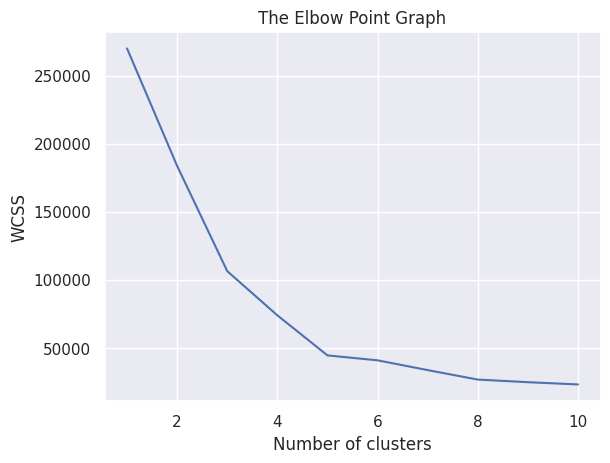

In [27]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Select elbow point after which there is no significnt drop in the graph

Optimal no of clusters=5

Training the K-means clustering Model

In [29]:
kmeans =KMeans(n_clusters=5,init='k-means++',random_state=0)
#retuen a label for each data point based on their cluster
Y=kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing the clusters

5 clusters - 0,1,2,3,4

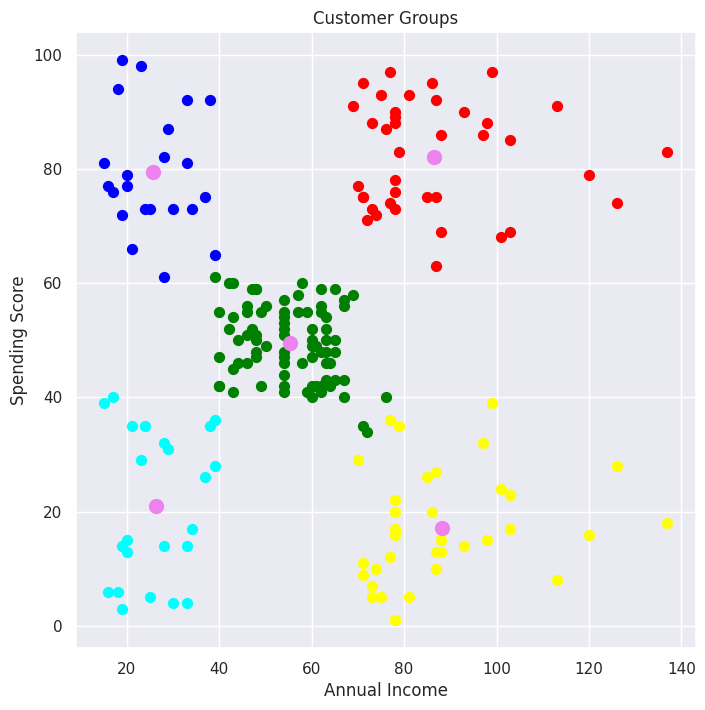

In [30]:
#plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='cyan',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster 5')
#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='violet',label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

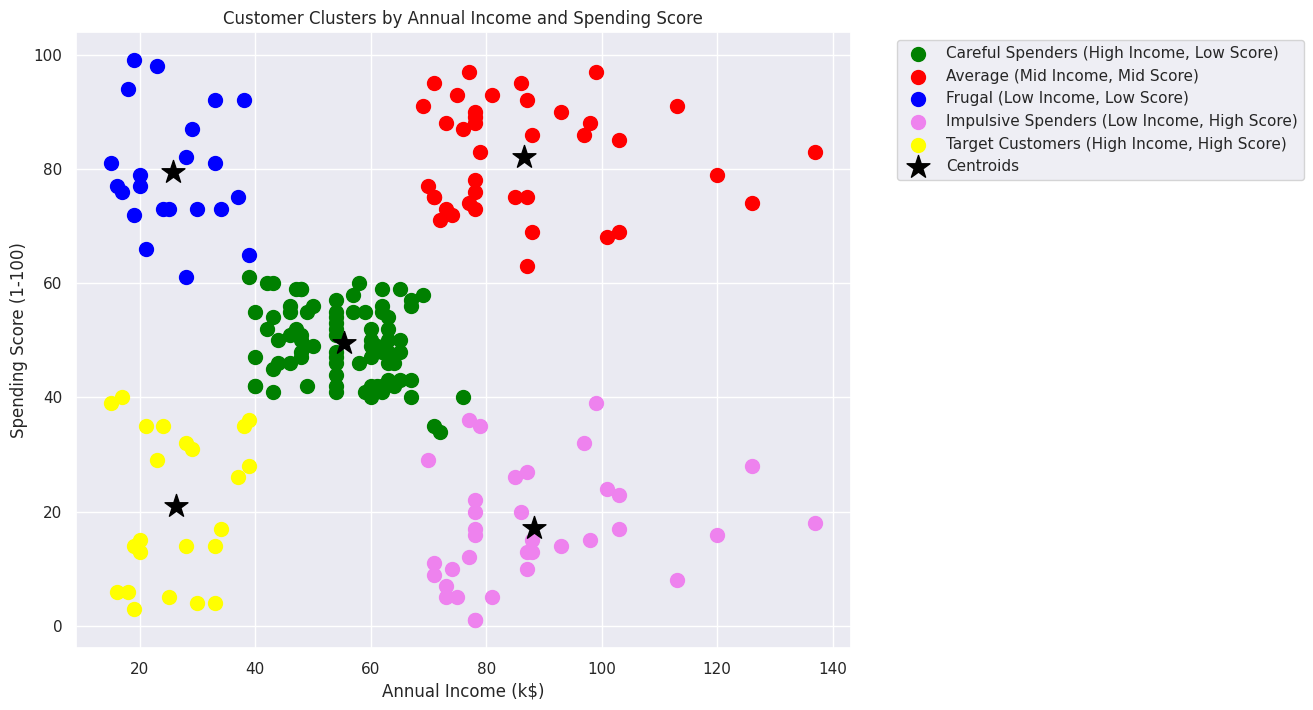

Cluster Analysis Complete. The new 'Cluster' column has been added to the DataFrame.


In [31]:
# Step 1: Initialize and Train K-Means with the optimal k=5
# The Elbow Method (from your previous cells) suggests 5 clusters.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
# fit_predict assigns a cluster label (0 to 4) to each data point
Y_kmeans = kmeans.fit_predict(X)

# Step 2: Visualize the 5 Clusters and their Centroids
plt.figure(figsize=(10, 8))

# Define the 5 clusters based on their typical characteristics (findings)
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s=100, c='green', label='Careful Spenders (High Income, Low Score)')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s=100, c='red', label='Average (Mid Income, Mid Score)')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s=100, c='blue', label='Frugal (Low Income, Low Score)')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s=100, c='violet', label='Impulsive Spenders (Low Income, High Score)')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s=100, c='yellow', label='Target Customers (High Income, High Score)')

# Plotting the cluster centers (Centroids)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='*')

plt.title('Customer Clusters by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Optional: Add the cluster labels back to the DataFrame for final analysis
customer_data['Cluster'] = Y_kmeans
print("Cluster Analysis Complete. The new 'Cluster' column has been added to the DataFrame.")